In [1]:
# kmeans 군집 예제
# from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# # Generate synthetic data with 3 clusters
# X, y = make_blobs(n_samples=200, centers=3, random_state=0)

# Load the data
url = 'cluster_example.csv'
df = pd.read_csv(url, usecols=['성별', '나이(세)', '측정값평균(mmHg)', '측정수(건)'])

# Remove rows with missing data
df.dropna(inplace=True)
df

,성별,나이(세),측정값평균(mmHg),측정수(건)
0,남성,20~24세,120,140380
1,남성,25~26세,121,139040
2,남성,27~28세,122,182758
3,남성,29~30세,122,194011
4,남성,31~32세,123,200275
...,...,...,...,...
3667,여성,67~68세,75,825
3668,여성,69~70세,75,677
3669,여성,71~72세,75,592
3670,여성,73~74세,75,425


In [3]:
# Standardize the data : 표준화
scaler = StandardScaler()
X = scaler.fit_transform(df[['측정값평균(mmHg)']].values)
X

array([[ 0.91777042],
       [ 0.95996464],
       [ 1.00215887],
       ...,
       [-0.98096983],
       [-0.98096983],
       [-1.02316406]])

In [4]:
# Fit a KMeans model to the data
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [5]:
# Predict the cluster labels for each point
y_pred = kmeans.predict(X)

df['cluster'] = y_pred

In [6]:
# Group the data by cluster and age group
df_grouped = df.groupby(['cluster', '나이(세)', '성별'])['측정값평균(mmHg)'].mean().reset_index()
print(df_grouped)

     cluster   나이(세)  성별  측정값평균(mmHg)
0          0  20~24세  남성    72.833333
1          0  20~24세  여성    69.235294
2          0  25~26세  남성    73.000000
3          0  25~26세  여성    69.205882
4          0  27~28세  여성    69.294118
..       ...     ...  ..          ...
144        3  59~60세  여성   118.250000
145        3  61~62세  여성   118.000000
146        3  63~64세  여성   118.500000
147        3  65~66세  여성   119.000000
148        3  67~68세  여성   119.000000

[149 rows x 4 columns]


In [7]:
df

,성별,나이(세),측정값평균(mmHg),측정수(건),cluster
0,남성,20~24세,120,140380,1
1,남성,25~26세,121,139040,1
2,남성,27~28세,122,182758,1
3,남성,29~30세,122,194011,1
4,남성,31~32세,123,200275,1
...,...,...,...,...,...
3667,여성,67~68세,75,825,2
3668,여성,69~70세,75,677,2
3669,여성,71~72세,75,592,2
3670,여성,73~74세,75,425,2


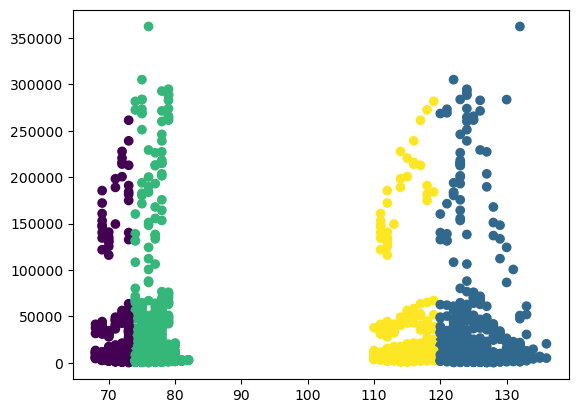

In [8]:
# Visualize the results
plt.scatter(df[['측정값평균(mmHg)']], df[['측정수(건)']], c=y_pred, cmap='viridis')
plt.show()